In [136]:
# set file path
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/INF2179/Group

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1Ho7TbxiUbkRfD1kmJG5e_Dw5LcMHodcp/Group


In [137]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.lines as mlines

##Read Dataset##

In [138]:
df = pd.read_csv('winequality-red.csv',delimiter=';')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [140]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [141]:
#check outliers

Q1 = df['residual sugar'].quantile(0.25)
Q3 = df['residual sugar'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['residual sugar'] < lower_bound) | (df['residual sugar'] > upper_bound)]
print("Number of outliers in 'residual sugar':", len(outliers))


Number of outliers in 'residual sugar': 155


In [142]:
#check missing value

missing_values = df.isnull().sum()

# Display the number of missing values per column
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


##EDA##

###Descriptive###

In [143]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [144]:
#value Counts for Categorical Data

print(df['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [145]:
#check Unique Values

for column in df.columns:
    print(f"{column} has {df[column].nunique()} unique values")


fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


###Plots###

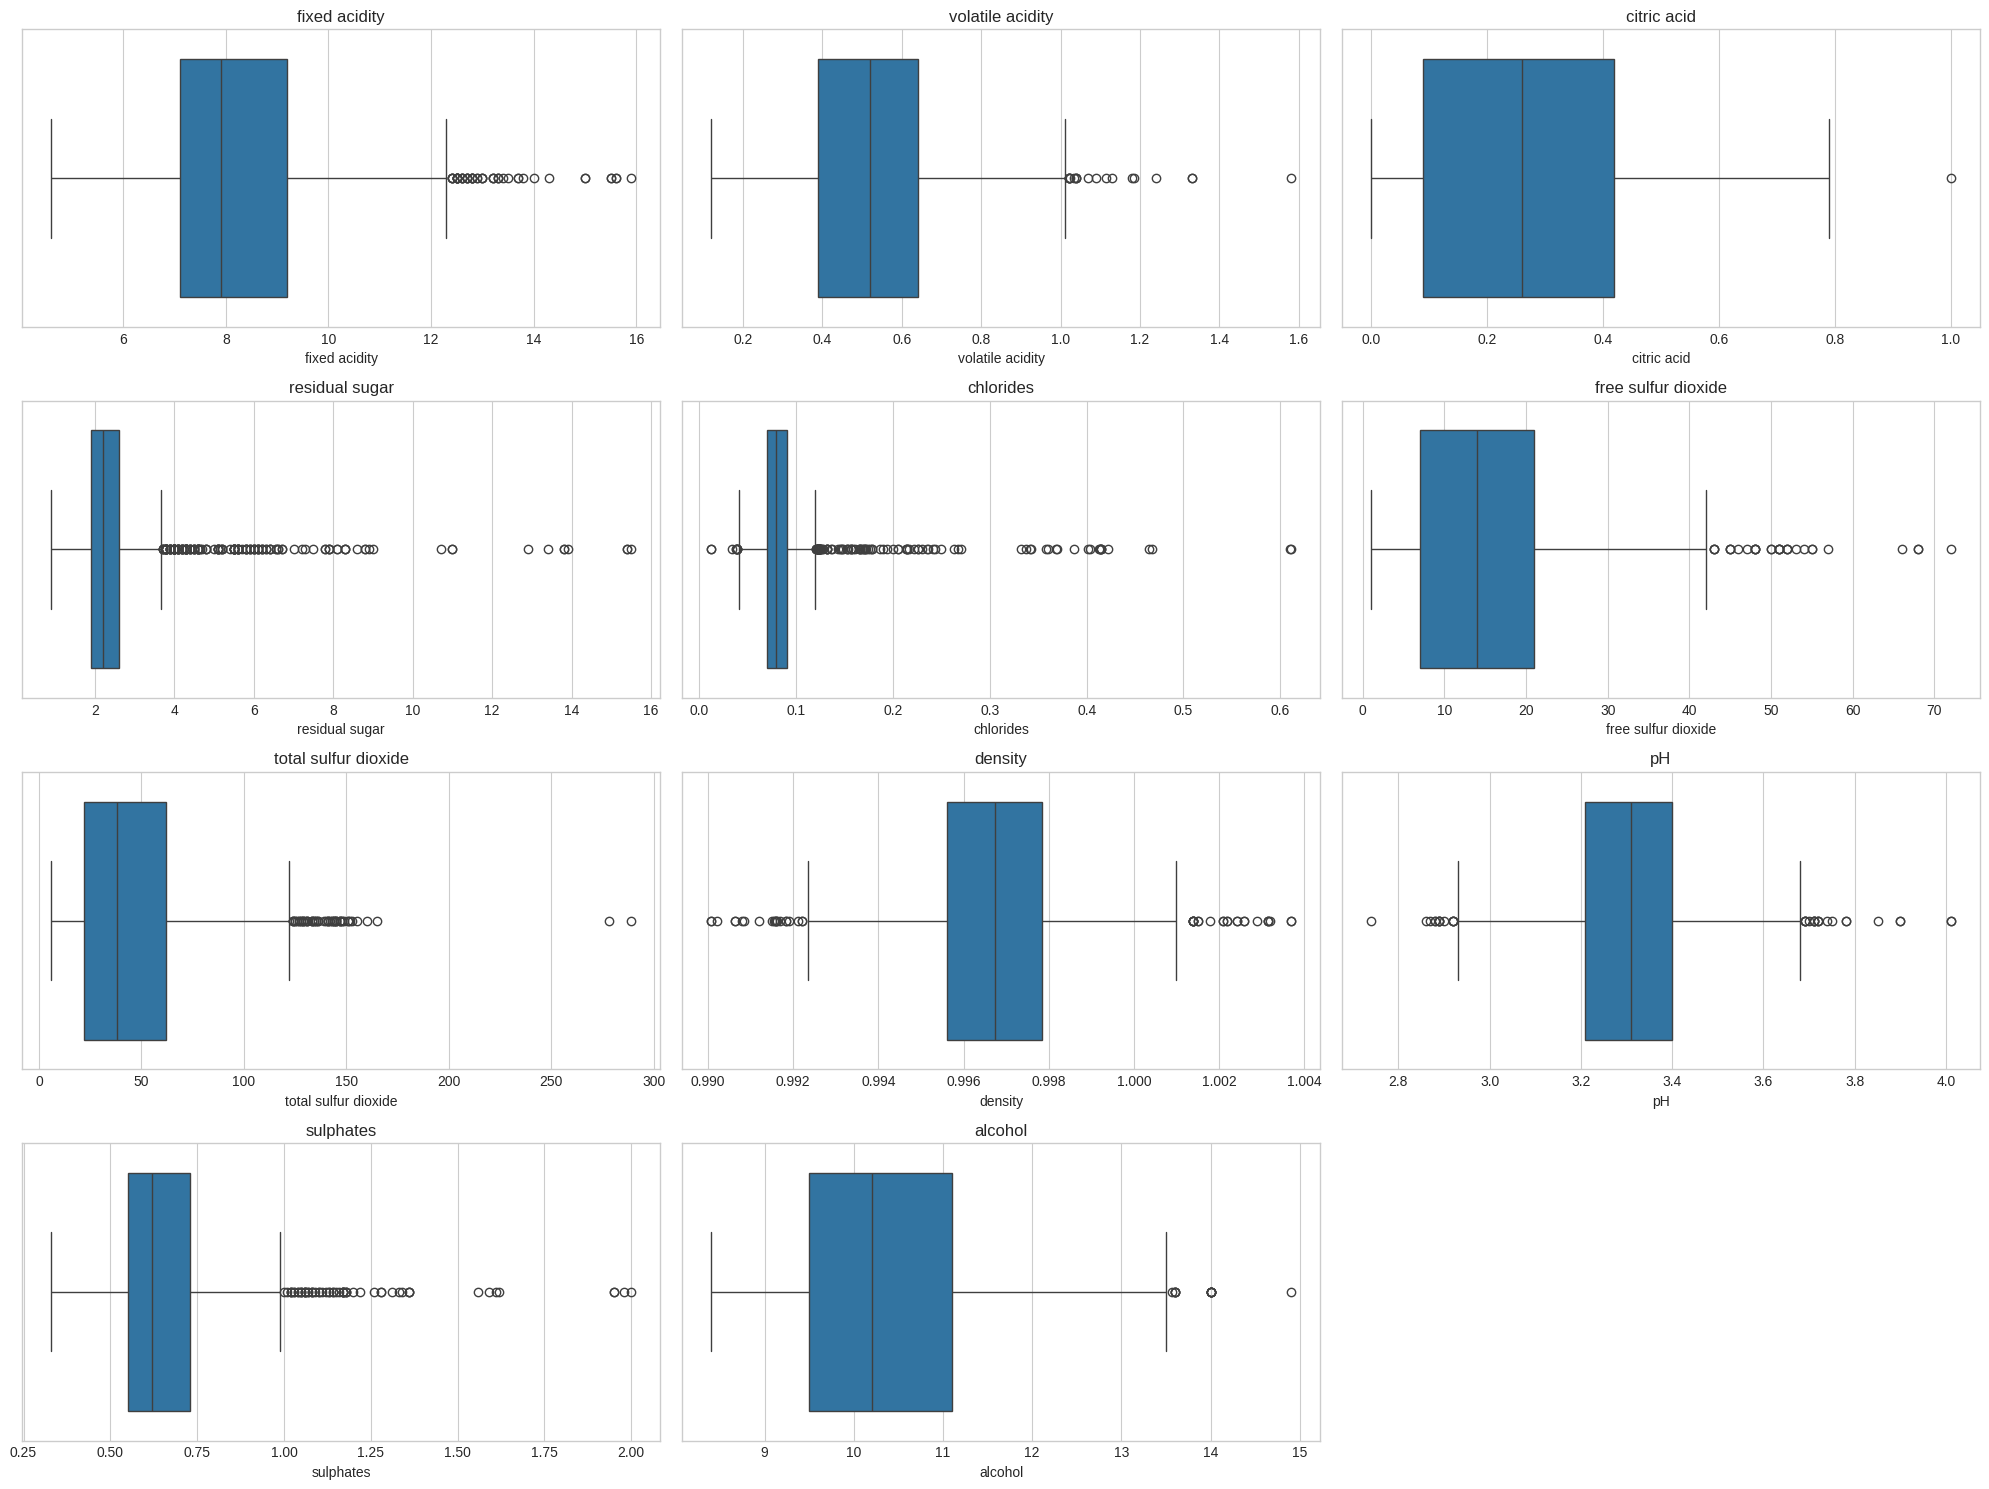

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Plot boxplots for all columns except 'quality'
for i, col in enumerate(df.drop('quality', axis=1).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

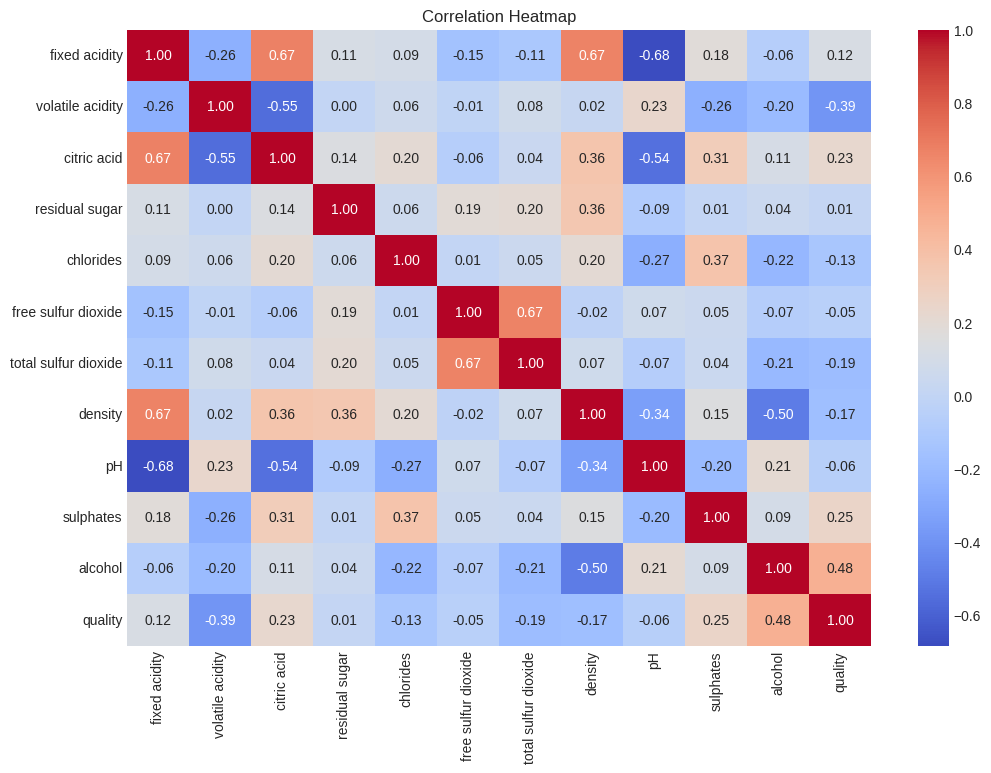

In [147]:
#Correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [148]:
#Feature correlation with target value quality

feature_correlation = df.corr()['quality'].sort_values()
print(feature_correlation)

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


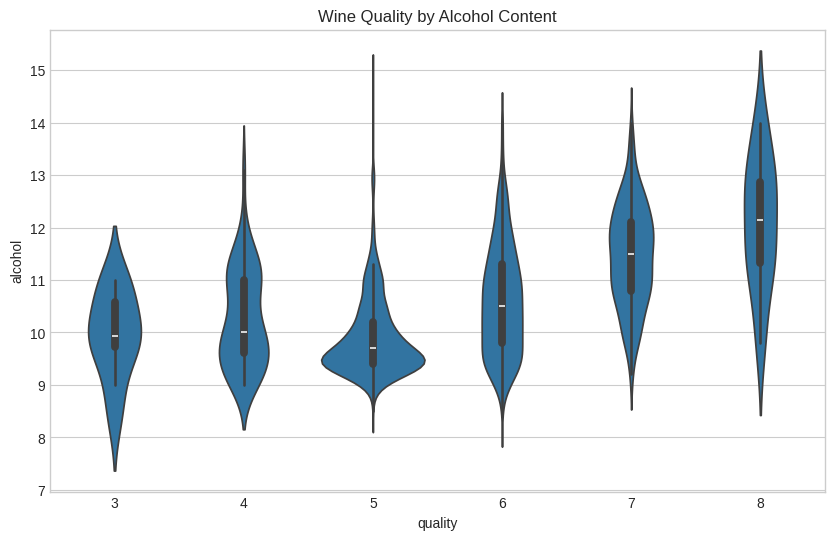

In [149]:
#Violin Plot

plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='alcohol', data=df)
plt.title('Wine Quality by Alcohol Content')
plt.show()

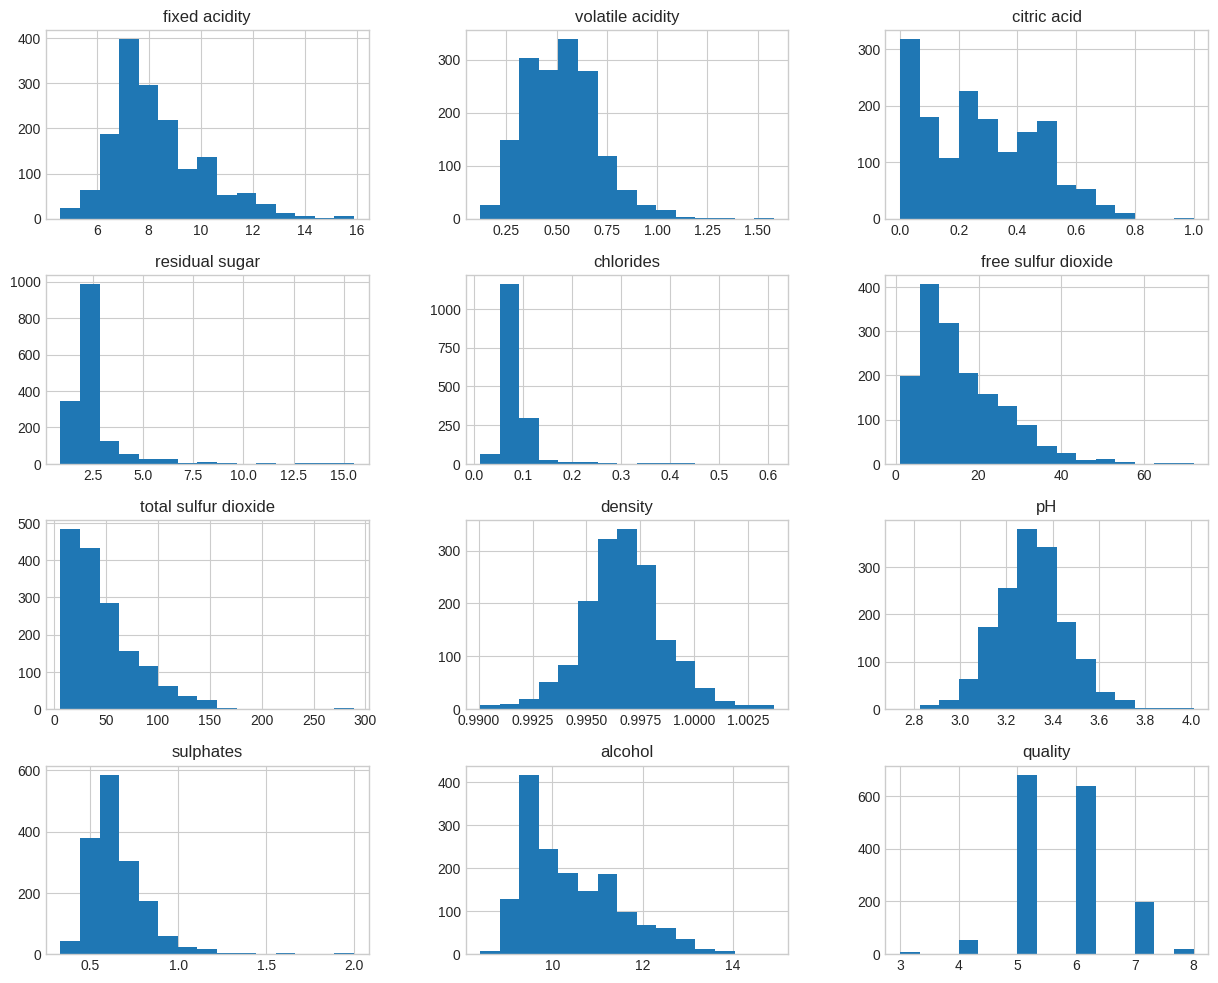

In [150]:
#Histogram see feature distribution

df.hist(bins=15, figsize=(15, 12))
plt.show()


## Data Cleaning and Preparation

In [151]:
# Normalize the features
normalization = MinMaxScaler()
X = df.drop(['quality'], axis=1)
X = normalization.fit_transform(X)

In [152]:
# Classify wines with a quality score greater than 5 as high-quality wines, and other wines as low-quality wines
df['rating'] = np.where(df['quality'] > 5, 'High', 'Low')

In [153]:
# Check the dataframe
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,High
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,High
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,High
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Low


In [154]:
# Define the target variable
y = df['rating']

In [155]:
# Separate the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Decision Tree

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
# Develop a basic Decision Tree model
dt_model = DecisionTreeClassifier(random_state = 0)

In [158]:
# Set decision tree parameters for grid search
parameters = {
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 3, 4],
    'max_leaf_nodes': [None, 40, 50]
}

# Conduct grid search using the parameter set and the basic decision tree model
grid = GridSearchCV(dt_model, parameters, cv = 5)
grid.fit(X_train, y_train)

# Show the best decision tree parameters generated by grid search
print(grid.best_params_)

{'max_depth': None, 'max_leaf_nodes': 40, 'min_samples_split': 2}


In [159]:
# Develop and train a Decision Tree model using the best decision tree parameters
dt_model = DecisionTreeClassifier(max_depth = None, max_leaf_nodes = 40, min_samples_split = 2, random_state = 0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=40, random_state=0)

In [160]:
# Predicts from the trained Decision Tree model
y_pred = dt_model.predict(X_test)

In [161]:
# Evaluate the Decision Tree model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, digits = 3))

Accuracy: 0.75625
              precision    recall  f1-score   support

        High      0.773     0.773     0.773       172
         Low      0.736     0.736     0.736       148

    accuracy                          0.756       320
   macro avg      0.755     0.755     0.755       320
weighted avg      0.756     0.756     0.756       320



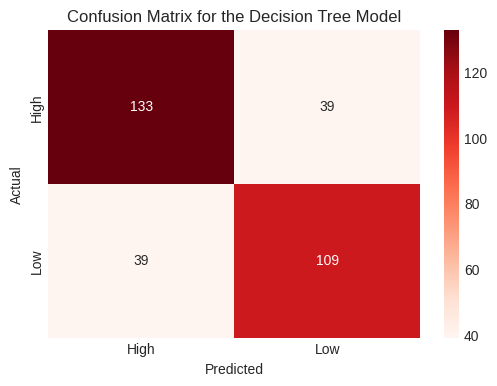

In [162]:
# Calculate the confusion matrix for the Decision Tree model
confusion_matr = confusion_matrix(y_test, y_pred)

# Draw the confusion matrix for the Decision Tree model
labels = ['High', 'Low']
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matr, annot = True, cmap = 'Reds', fmt = 'g', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Decision Tree Model')
plt.show()

In [163]:
# Predict probability for the target variable (i.e., rating)
y_prob = dt_model.predict_proba(X_test)

# Map high and low to binary numbers
label_map = {'High': 0, 'Low': 1}
y_test_roc = np.array([label_map[label] for label in y_test])

# Calculate the ROC for the Decision Tree model
fp, tp, thresholds = roc_curve(y_test_roc, y_prob[:, 1])

# Calculate the AUC for the Decision Tree model
dt_auc = auc(fp, tp)
print(dt_auc)

0.8034844437460718


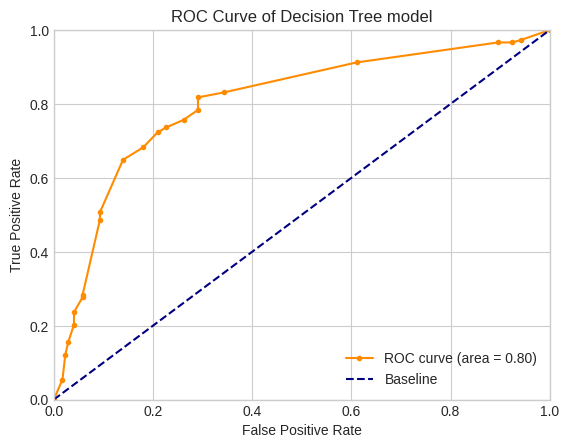

In [164]:
# Draw the ROC curve for the Decision Tree model
plt.figure()
plt.plot(fp, tp, marker = '.', color='darkorange', label = 'ROC curve (area = %0.2f)' % dt_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--', label = 'Baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Decision Tree model')
plt.legend(loc = 'lower right')
plt.show()

## Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
# Develop a basic Random Forest model
rf_model = RandomForestClassifier(random_state = 0)

In [167]:
# Set random forest parameters for grid search
parameters = {
    'n_estimators': [20, 50, 100],
    'max_depth': [None, 100, 200]
}

# Conduct grid search using the parameter set and the basic random forest model
grid = GridSearchCV(rf_model, parameters, cv = 5)
grid.fit(X_train, y_train)

# Show the best random forest parameters generated by grid search
print(grid.best_params_)

{'max_depth': None, 'n_estimators': 50}


In [168]:
# Develop and train a Random Forest model using the best random forest parameters
rf_model = RandomForestClassifier(max_depth = None, n_estimators = 50, random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [169]:
# Predicts from the trained Random Forest model
y_pred = rf_model.predict(X_test)

In [170]:
# Evaluate the Random Forest model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, digits = 3))

Accuracy: 0.821875
              precision    recall  f1-score   support

        High      0.836     0.831     0.834       172
         Low      0.805     0.811     0.808       148

    accuracy                          0.822       320
   macro avg      0.821     0.821     0.821       320
weighted avg      0.822     0.822     0.822       320



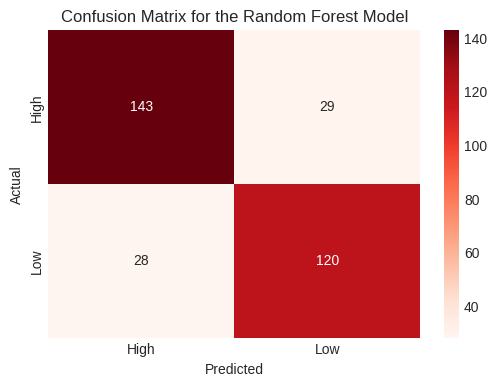

In [171]:
# Calculate the confusion matrix for the Random Forest model
confusion_matr = confusion_matrix(y_test, y_pred)

# Draw the confusion matrix for the Random Forest model
labels = ['High', 'Low']
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matr, annot = True, cmap = 'Reds', fmt = 'g', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Random Forest Model')
plt.show()

In [172]:
# Predict probability for the target variable (i.e., rating)
y_prob = rf_model.predict_proba(X_test)

# Map high and low to binary numbers
label_map = {'High': 0, 'Low': 1}
y_test_roc = np.array([label_map[label] for label in y_test])

# Calculate the ROC for the Random Forest model
fp, tp, thresholds = roc_curve(y_test_roc, y_prob[:, 1])

# Calculate the AUC for the Random Forest model
rf_auc = auc(fp, tp)
print(rf_auc)

0.9087641420490258


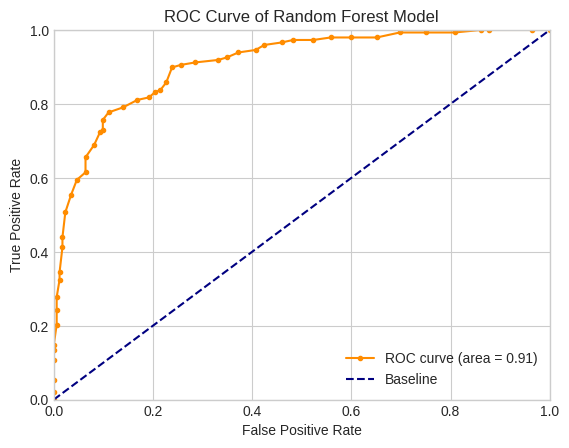

In [173]:
# Draw the ROC curve for the Random Forest model
plt.figure()
plt.plot(fp, tp, marker = '.', color='darkorange', label = 'ROC curve (area = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--', label = 'Baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest Model')
plt.legend(loc = 'lower right')
plt.show()

## Logistic Regression

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
# Develop a basic Logistic Regression model
lr_model = LogisticRegression(random_state = 0)

In [176]:
# Set logistic regression parameters for grid search
parameters = {
    'max_iter': [50, 100, 500, 1000]
}

# Conduct grid search using the parameter set and the basic logistic regression model
grid = GridSearchCV(lr_model, parameters, cv = 5)
grid.fit(X_train, y_train)

# Show the best logistic regression parameters generated by grid search
print(grid.best_params_)

{'max_iter': 50}


In [177]:
# Develop and train a Logistic Regression model using the best logistic regression parameters
lr_model = LogisticRegression(max_iter = 50, random_state = 0)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=50, random_state=0)

In [178]:
# Predicts from the trained Logistic Regression model
y_pred = lr_model.predict(X_test)

In [179]:
# Evaluate the Logistic Regression model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, digits = 3))

Accuracy: 0.746875
              precision    recall  f1-score   support

        High      0.769     0.756     0.762       172
         Low      0.722     0.736     0.729       148

    accuracy                          0.747       320
   macro avg      0.746     0.746     0.746       320
weighted avg      0.747     0.747     0.747       320



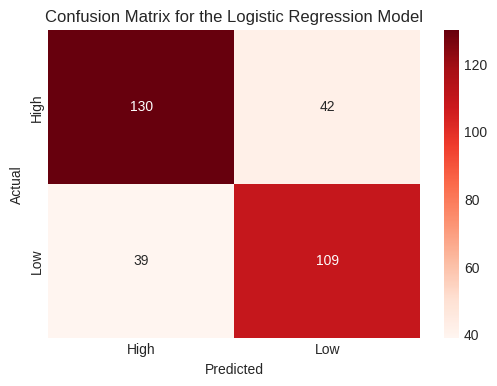

In [180]:
# Calculate the confusion matrix for the Logistic Regression model
confusion_matr = confusion_matrix(y_test, y_pred)

# Draw the confusion matrix for the Logistic Regression model
labels = ['High', 'Low']
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matr, annot = True, cmap = 'Reds', fmt = 'g', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Logistic Regression Model')
plt.show()

In [181]:
# Predict probability for the target variable (i.e., rating)
y_prob = lr_model.predict_proba(X_test)

# Map high and low to binary numbers
label_map = {'High': 0, 'Low': 1}
y_test_roc = np.array([label_map[label] for label in y_test])

# Calculate the ROC for the Logistic Regression model
fp, tp, thresholds = roc_curve(y_test_roc, y_prob[:, 1])

# Calculate the AUC for the Logistic Regression model
lr_auc = auc(fp, tp)
print(lr_auc)

0.8268384663733501


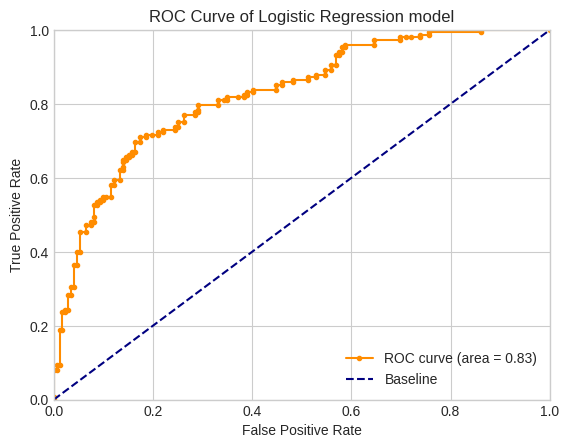

In [182]:
# Draw the ROC curve for the Logistic Regression model
plt.figure()
plt.plot(fp, tp, marker = '.', color='darkorange', label = 'ROC curve (area = %0.2f)' % lr_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--', label = 'Baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression model')
plt.legend(loc = 'lower right')
plt.show()

## Explainability

### Feature Importantce

Random Forest
Important features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


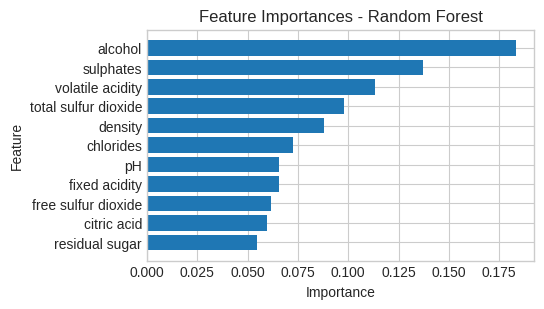

Feature Importances:
                 Feature  Importance
10               alcohol    0.183361
9              sulphates    0.137153
1       volatile acidity    0.113269
6   total sulfur dioxide    0.098153
7                density    0.088177
4              chlorides    0.072543
8                     pH    0.065732
0          fixed acidity    0.065538
5    free sulfur dioxide    0.061832
2            citric acid    0.059473
3         residual sugar    0.054770


In [183]:
# Get feature importance from RF model
feature_importance = rf_model.feature_importances_
features = df.drop(['quality', 'rating'], axis=1).columns
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
features_df = features_df.sort_values(by = 'Importance', ascending = True)
print(f"Random Forest")
print(f"Important features: {features}")
# Plot feature importance
plt.figure(figsize=(5, 3))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Feature Importances - Random Forest')
plt.show()
# Print feature importance
print(f"Feature Importances:")
print(features_df.sort_values(by = 'Importance', ascending = False))

### ICE

We cannot import the package successfuly, so we applied the ICE and PDP mannually.

In [184]:
wine_headers = df.columns
wine_data = X # normalized values

In [185]:
# Check the unique values of each feature
for v in range(len(wine_headers)-2):
    print(wine_headers[v] + " (feature index " + str(v) + "), : ", len(set(wine_data[:,v])))

fixed acidity (feature index 0), :  96
volatile acidity (feature index 1), :  143
citric acid (feature index 2), :  80
residual sugar (feature index 3), :  91
chlorides (feature index 4), :  153
free sulfur dioxide (feature index 5), :  60
total sulfur dioxide (feature index 6), :  144
density (feature index 7), :  436
pH (feature index 8), :  89
sulphates (feature index 9), :  96
alcohol (feature index 10), :  65


In [186]:
# Define the function to augment original records
def create_scoring_dataset(chosen_feature, unique_values, scoring_data):
    scoring_tables = [None] * len(unique_values)
    for w in range(len(unique_values)):
        scoring_tables[w] = scoring_data.copy()
        scoring_tables[w][:,chosen_feature] = unique_values[w]
    return scoring_tables

In [187]:
selected_feature = 10 # alcohol
feature_selected = wine_headers[selected_feature]
values_unique = list(set(wine_data.copy()[:,selected_feature]))
scoring_prepared = create_scoring_dataset(selected_feature, values_unique, X)

In [188]:
# Calculate the probability of augmented records
scored_tables = [None] * len(scoring_prepared)
for x in range(len(scoring_prepared)):
    scored_tables[x] = [rf_model.predict_proba(scoring_prepared[x])]

In [189]:
distinct_values = np.transpose(values_unique.copy())
instance_values = np.transpose(scored_tables.copy())

<ipython-input-190-aac2d0b0cc30>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


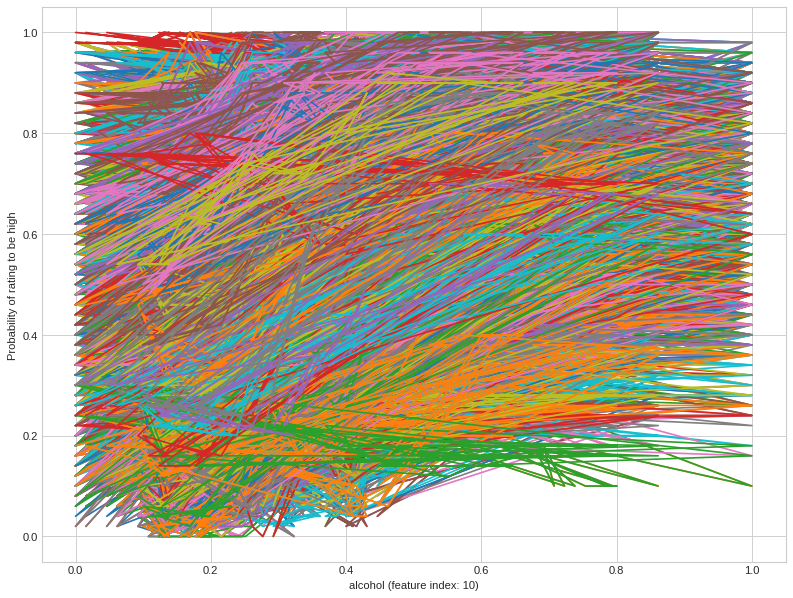

In [190]:
plt.style.use('seaborn-whitegrid')
fig, ax1 = plt.subplots(figsize=(12, 9), dpi=80)
plt.xlabel(feature_selected  + " (feature index: " + str(selected_feature) + ")")
plt.ylabel('Probability of rating to be high')
for y in range(len(instance_values[0])):
    plt.plot(distinct_values, np.transpose(instance_values[0][y]), '-')

<ipython-input-191-565817bc7fcc>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


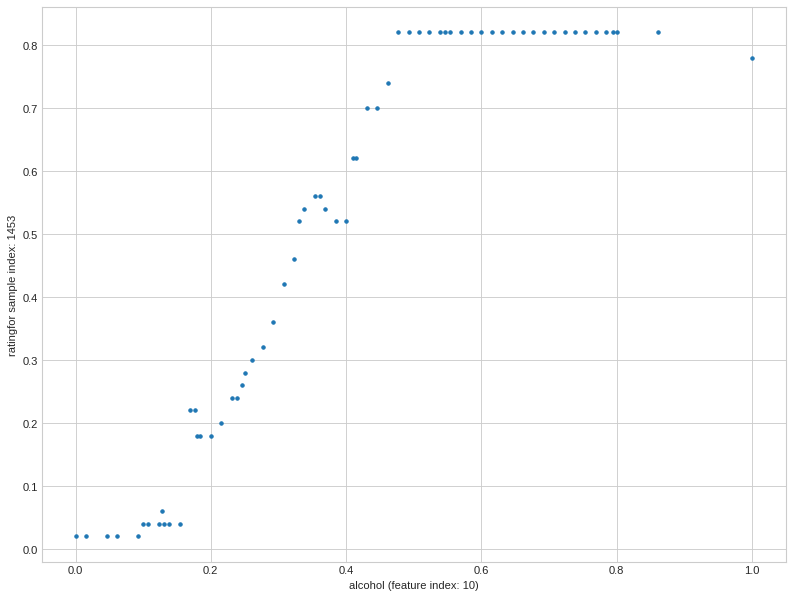

In [191]:
# Select any instance or choose any at random
# rand_instance = random.randrange(0, len(instance_values[0]))
rand_instance = 1453 # For the purpose of reproducing
chosen_instance = np.transpose(instance_values[0][rand_instance]).flatten()
plt.style.use('seaborn-whitegrid')
fig, ax1 = plt.subplots(figsize=(12, 9), dpi=80)
plt.xlabel(feature_selected  + " (feature index: " + str(selected_feature) + ")")
plt.ylabel(wine_headers[len(wine_headers)-1] + "for sample index: " + str(rand_instance))
plt.plot(distinct_values, chosen_instance, '.')

In [192]:
pd.DataFrame(X).iloc[:,10].describe()

count    1599.000000
mean        0.311228
std         0.163949
min         0.000000
25%         0.169231
50%         0.276923
75%         0.415385
max         1.000000
Name: 10, dtype: float64

In [193]:
df.iloc[:,10].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [194]:
df.iloc[1453]

fixed acidity               7.6
volatile acidity           0.49
citric acid                0.33
residual sugar              1.9
chlorides                 0.074
free sulfur dioxide        27.0
total sulfur dioxide       85.0
density                 0.99706
pH                         3.41
sulphates                  0.58
alcohol                     9.0
quality                       5
rating                      Low
Name: 1453, dtype: object

In [195]:
print(X[1453])

[0.26548673 0.25342466 0.33       0.06849315 0.10350584 0.36619718
 0.27915194 0.51321586 0.52755906 0.1497006  0.09230769]


### PDP

In [196]:
tables_scored = []
for z in range(len(scored_tables)):
    tables_scored.append(np.average(scored_tables[z][0][0][0].flatten())) # Calculate the average probability of rating to be high

<ipython-input-197-7d73850b6bb4>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


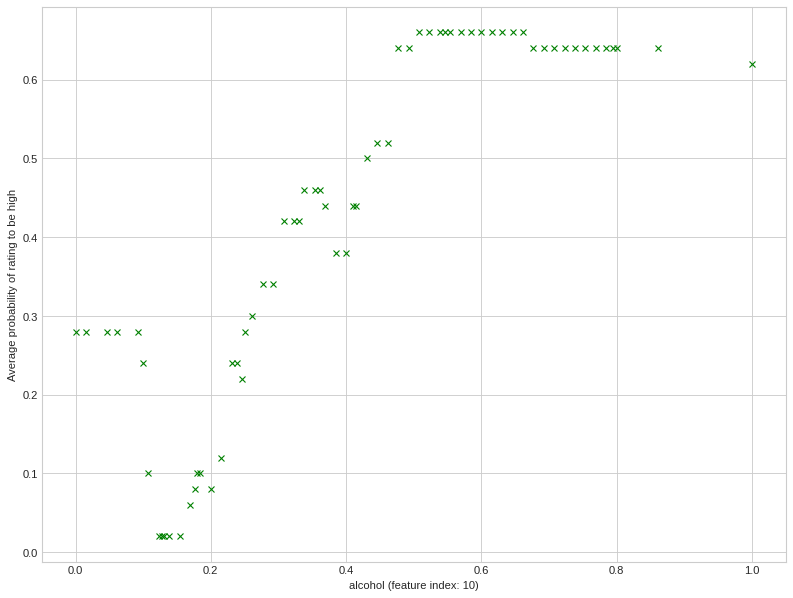

In [197]:
plt.style.use('seaborn-whitegrid')
fig, ax1 = plt.subplots(figsize=(12, 9), dpi=80)
plt.xlabel(feature_selected  + " (feature index: " + str(selected_feature) + ")")
plt.ylabel("Average probability of rating to be high")
for z in range(len(distinct_values)):
    plt.plot(distinct_values, tables_scored, 'x', color='g');
    break

### Combination of ICE and PDP

<ipython-input-198-0fb3790d72f3>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


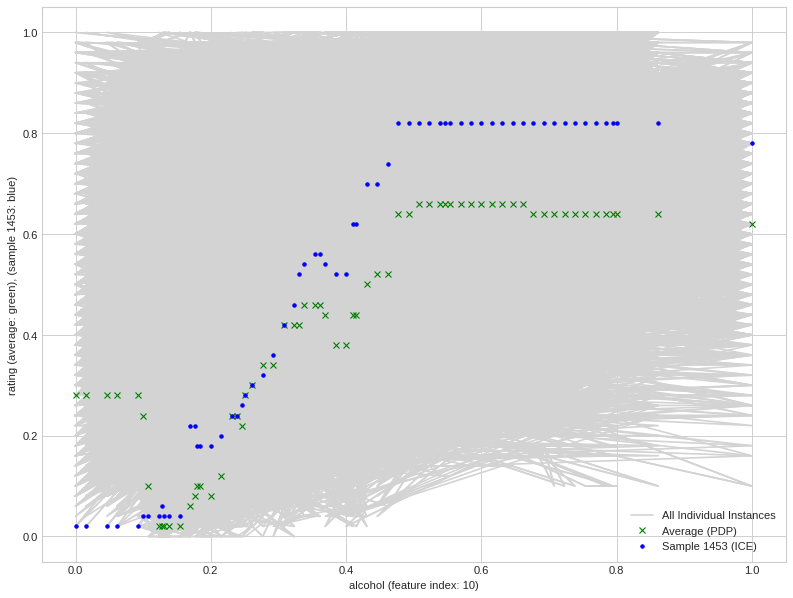

In [198]:
plt.style.use('seaborn-whitegrid')
fig, ax1 = plt.subplots(figsize=(12, 9), dpi=80)
plt.xlabel(feature_selected  + " (feature index: " + str(selected_feature) + ")")
plt.ylabel(wine_headers[len(wine_headers)-1] + " (average: green), (sample " + str(rand_instance) + ": blue)")
for y in range(len(instance_values[0])):
    plt.plot(distinct_values, np.transpose(instance_values[0][y]), '-', color='lightgrey')
for z in range(len(distinct_values)):
    plt.plot(distinct_values, tables_scored, 'x', color = 'green');
    break
plt.plot(distinct_values, chosen_instance, '.', color = 'blue')

individual_lines = mlines.Line2D([], [], color='lightgrey', linestyle = '-', label='All Individual Instances')
average_points = mlines.Line2D([], [], color='green', marker = 'x', linestyle = 'None', label='Average (PDP)')
selected_sample = mlines.Line2D([], [], color='blue', marker = '.', linestyle = 'None', label=f'Sample {rand_instance} (ICE)')

plt.legend(handles=[individual_lines, average_points, selected_sample], loc='lower right')

plt.show()